In [20]:
#code by sai teja varanasi.
#importing libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.sparse.linalg import eigs#counterpart from matlab for python

In [22]:
#reading data
img_dat=np.zeros((16,19200,1))
for i in range(16):
  img_dat[i]=np.reshape(plt.imread('../data/data_fruit/image_'+str(i+1)+'.png'),(19200,1))
img_dat=np.array(img_dat,dtype="float64")

In [29]:
#some helper functions to show a image direclty form (19200,1) data and conversions
#my_show is to return a reshaped version to plot (it also normalised data to (0,1))
def my_show(arr):
  new_arr=np.reshape(arr,(80,80,3))
  return (new_arr-np.min(new_arr))/np.ptp(new_arr)
#trans is to take transpose
def trans(arr):
    x,y=np.shape(arr)
    xarr=np.zeros((y,x))
    for i in range(x):
      for j in range(y):
          xarr[j][i]=arr[i][j]
    return xarr

In [4]:
#computing and storing mean of observations:
def mean(arr):
  ans=np.zeros((19200,1))
  for i in arr:
    ans=ans+i
  return ans/arr.shape[0]
val_mean=mean(img_dat)


In [17]:
#covariance
def cov(arr):
  a_mean=mean(arr)
  mat=np.zeros((19200,19200))
  for i in arr:
    mat=mat+np.matmul(i-a_mean,trans(i-a_mean))
  return mat/arr.shape[0]
C=cov(img_dat)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


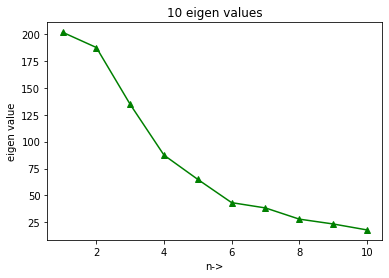

Text(0.5, 1.0, 'eigen vector 4')

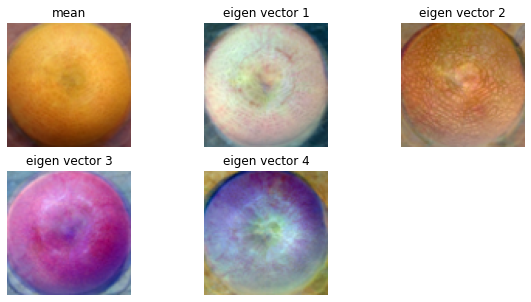

In [30]:
#eigen vectors and eigen values
def find_eigs(arr,num):
  ans_arr=np.zeros((19200,num))
  W,V=eigs(arr,10)
  indices=(-W).argsort()[:num]
  for i in range(num):
    ans_arr[:,i]=V[:,indices[i]]
  return (ans_arr,W[indices],W)
vecs,eigs_x,W=find_eigs(C,4)
eig_tot=W[(-W).argsort()[:10]]
#plot eigen values
plt.title('10 eigen values')
plt.xlabel('n->')
plt.ylabel('eigen value')
plt.plot(range(1,11),eig_tot,'g^-')
plt.show()
#end of eigen plot
#plotting eigne vals and mean
fig=plt.figure(figsize=(10,5))
fig.add_subplot(2,3,1)
plt.imshow(my_show(val_mean))
plt.axis('off')
plt.title('mean')
fig.add_subplot(2,3,2)
plt.imshow(my_show(trans(np.array([vecs[:,0]]))))
plt.axis('off')
plt.title('eigen vector 1')
fig.add_subplot(2,3,3)
plt.imshow(my_show(trans(np.array([vecs[:,1]]))))
plt.axis('off')
plt.title('eigen vector 2')
fig.add_subplot(2,3,4)
plt.imshow(my_show(trans(np.array([vecs[:,2]]))))
plt.axis('off')
plt.title('eigen vector 3')
fig.add_subplot(2,3,5)
plt.imshow(my_show(trans(np.array([vecs[:,3]]))))
plt.axis('off')
plt.title('eigen vector 4')
plt.show()
#end of part a

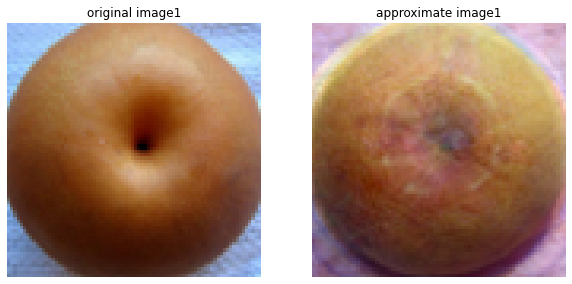

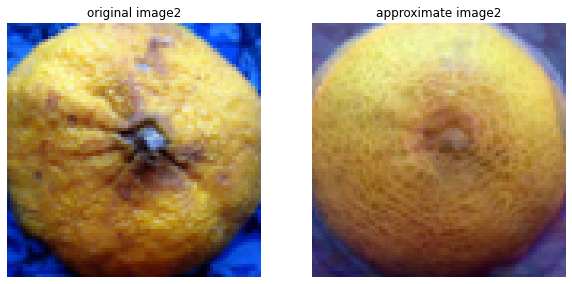

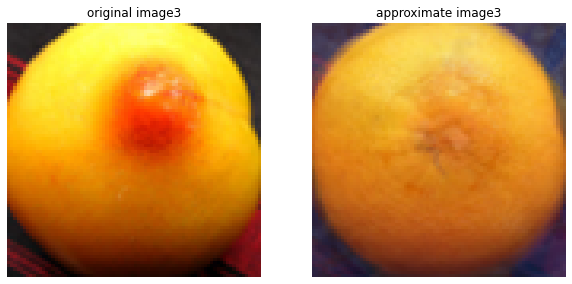

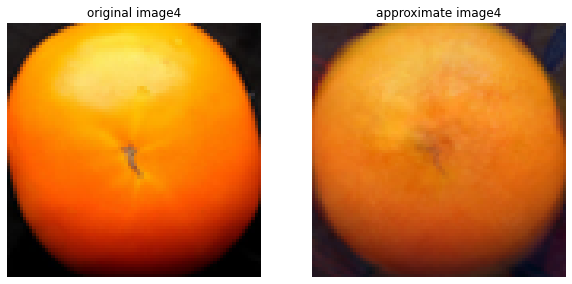

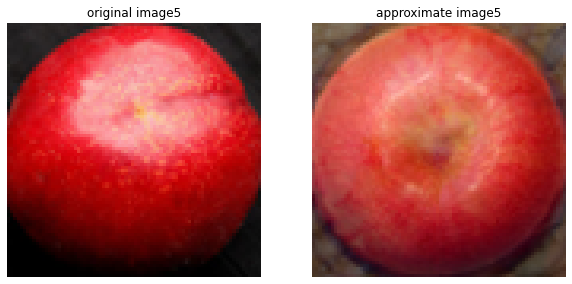

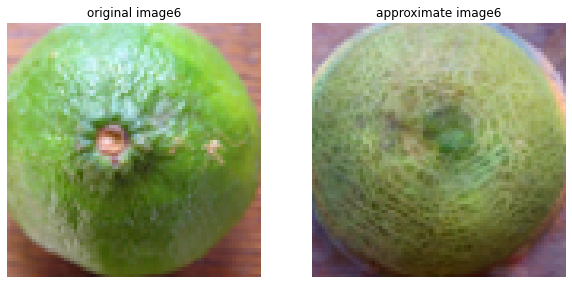

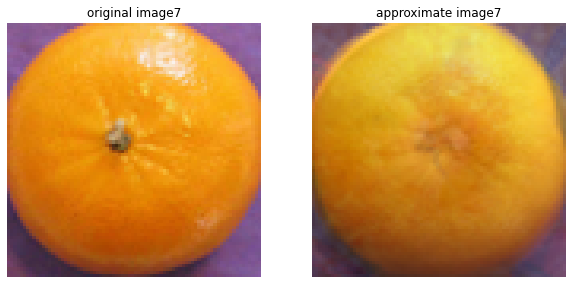

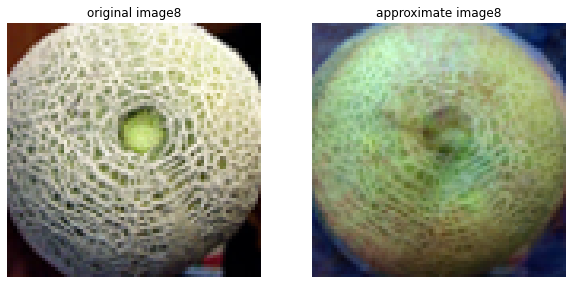

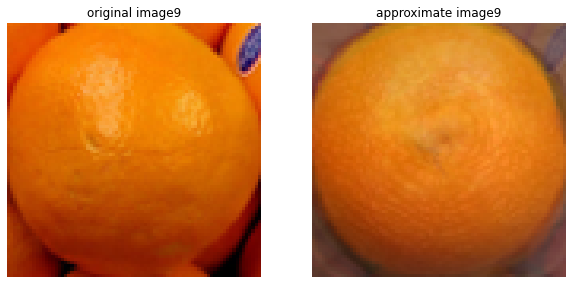

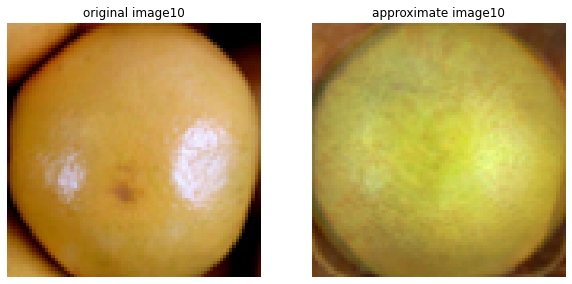

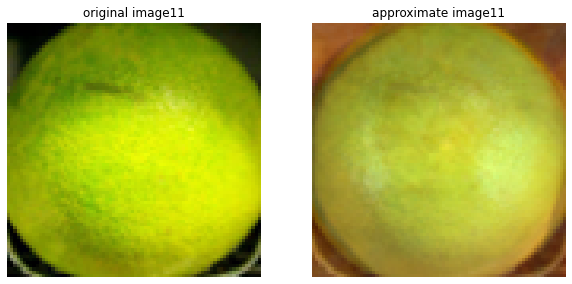

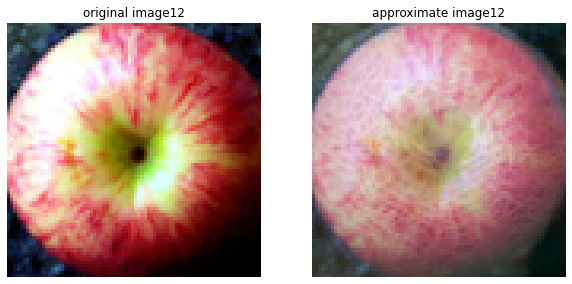

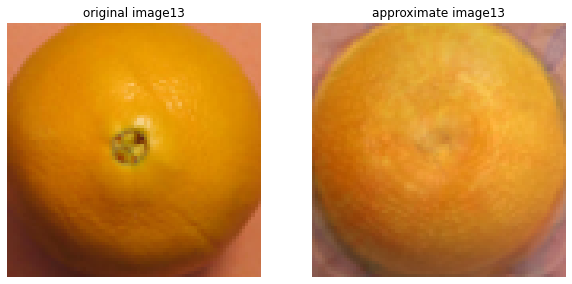

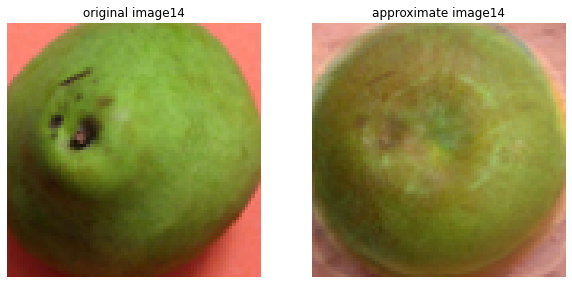

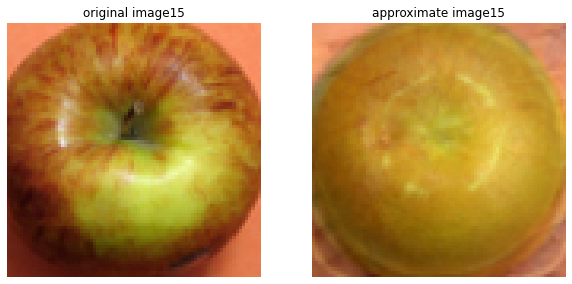

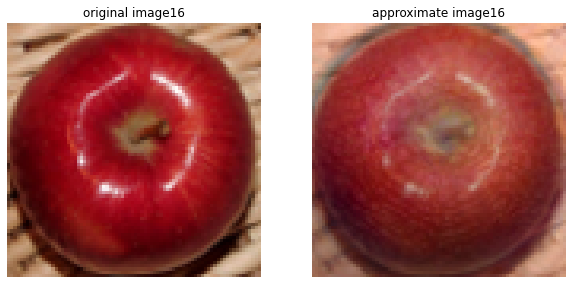

In [31]:
#part c
#best_app returns best approximation of an image
def best_app(arr):
  x=np.matmul(trans(vecs),arr-val_mean)
  ans=np.zeros((19200,1))
  ans=ans+val_mean
  for i in range(4):
     ans=ans+x[i,0]*(trans([vecs[:,i]]))
  return ans
for i in range(16):
  fig=plt.figure(figsize=(10,5))
  fig.add_subplot(1,2,2)
  plt.imshow(my_show(best_app(img_dat[i])))
  plt.axis('off')
  plt.title('approximate image'+str(i+1))
  fig.add_subplot(1,2,1)
  plt.imshow(my_show(img_dat[i]))
  plt.axis('off')
  plt.title('original image'+str(i+1))
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


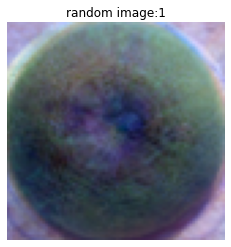

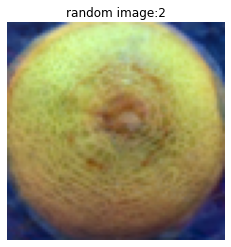

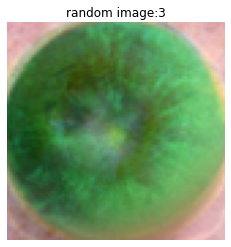

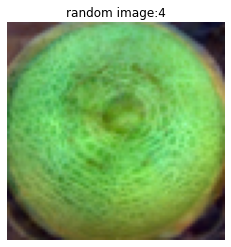

In [34]:
np.random.seed(1111)
#generatinfg a random varaible between (0,1)
def gen_rand(lamda):
  x=2*np.random.randn()-1
  return math.sqrt(lamda)*x
#generating a arandom image
def gen_image():
  ans=val_mean
  for i in range(4):
    ans=ans+gen_rand(eigs_x[i])*trans([vecs[:,i]])
  return my_show(ans)
#plotting random images
for i in range(4):
  plt.title('random image:'+str(i+1))
  plt.axis('off')
  plt.imshow(gen_image())
  plt.show()